<a href="https://colab.research.google.com/github/harshraj0/HACK_HERITAGE-AQUATECH/blob/main/Data_Manipulation_%26_Forecast_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas numpy matplotlib statsmodels

In [ ]:
import pandas as pd

def generate_monthly_breakdown(input_file, output_file):
    # Load the dataset from an Excel or CSV file
    df = pd.read_excel(input_file) if input_file.endswith('.xlsx') else pd.read_csv(input_file)
    print(df.head())
    # Define the seasonal weight for each month
    seasonal_weights = {
    'January': 0.074,  # Winter, slightly higher for heating and agriculture
    'February': 0.076, # Late winter, similar to January with a slight increase
    'March': 0.113,    # Pre-monsoon, demand starts to increase
    'April': 0.121,    # Summer begins, increased water usage for cooling and agriculture
    'May': 0.131,      # Peak summer, maximum water demand across sectors
    'June': 0.104,     # Start of monsoon, slight reduction in water usage
    'July': 0.088,     # Monsoon, significant reduction in agricultural water usage
    'August': 0.083,   # Monsoon continues, low irrigation needs
    'September': 0.072,# Post-monsoon, further reduced water demand
    'October': 0.078,  # Early winter, demand starts to rise slightly
    'November': 0.079, # Winter, moderate water usage
    'December': 0.081  # End of year, water demand similar to January
}



    # Map months to their corresponding numbers for date conversion
    month_numbers = {
        'January': '01', 'February': '02', 'March': '03', 'April': '04',
        'May': '05', 'June': '06', 'July': '07', 'August': '08',
        'September': '09', 'October': '10', 'November': '11', 'December': '12'
    }

    # Validate required columns
    required_columns = ['district ', 'state', 'year','gws','irrigation','industrial', 'domestic', 'total','fa']
    print(df.columns)
    for col in required_columns:
        if col not in df.columns:
            raise ValueError(f"Column '{col}' is missing from the dataset")

    # Calculate the monthly breakdown
    monthly_data = []

    for _, row in df.iterrows():
        district = row['district ']
        state = row['state']
        year = row['year']
        for month, weight in seasonal_weights.items():
            # Create a date in the format YYYY-MM-DD (e.g., 2021-01-01 for January 2021)
            date = f"{year}-{month_numbers[month]}-01"
            monthly_data.append({
                'district': district,
                'state': state,
                'date': date,
                'gws': row['gws'],
                'irrigation': row['irrigation'] * weight,
                'industrial': row['industrial'] * weight,
                'domestic': row['domestic'] * weight,
                'total': row['total'] * weight,
                'total_year':row['total'],
                'fa': row['fa']
            })

    # Create a new DataFrame with the monthly breakdown
    monthly_df = pd.DataFrame(monthly_data)
    print(monthly_df.head())
    # Convert the Date column to datetime format (optional but recommended)
    #monthly_df['Date'] = pd.to_datetime(monthly_df['Date'])

    # Save the output to an Excel or CSV file
    if output_file.endswith('.xlsx'):
        monthly_df.to_excel(output_file, index=False)
    else:
        monthly_df.to_csv(output_file, index=False)

    print(f"Monthly breakdown successfully saved to {output_file}")

# Example usage
input_file = '/content/data_of_water_need.xlsx'  # Replace with your actual file name
output_file = 'water_usage_final_3.xlsx'  # Replace with your desired output file name

generate_monthly_breakdown(input_file, output_file)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


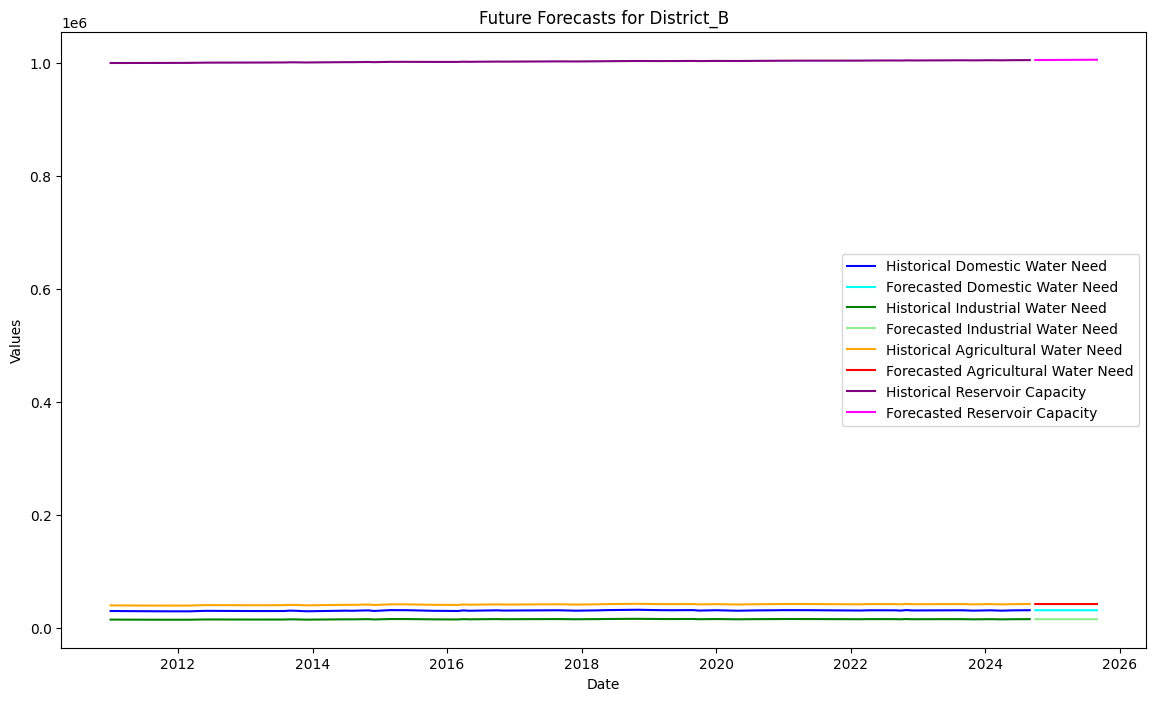

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime
num_points = 10000  # Adjust for performance; 1 million for demonstration
end_date = datetime.now().strftime('%Y-%m-%d')  # End date as today's date
start_date = (datetime.now() - pd.DateOffset(days=num_points // 2)).strftime('%Y-%m-%d')  # Start date


# Generate date range
date_range = pd.date_range(start=start_date, end=end_date, freq='M')  # Daily frequency

# Generate base values
base_population = 1000000
base_water_need_domestic = 30000
base_water_need_industrial = 15000
base_water_need_agricultural = 40000
base_reservoir_capacity = 1000000

# Simulate realistic growth and seasonal variations
def generate_realistic_data(dates):
    num_days = len(dates)
    time_index = np.arange(num_days)

    # Trend components
    population_trend = base_population + 10000 * (time_index / num_days)  # Gradual increase in population
    domestic_trend = base_water_need_domestic + 1000 * (time_index / num_days)  # Increase in domestic water need
    industrial_trend = base_water_need_industrial + 500 * (time_index / num_days)  # Increase in industrial water need
    agricultural_trend = base_water_need_agricultural + 2000 * (time_index / num_days)  # Increase in agricultural water need
    reservoir_trend = base_reservoir_capacity + 5000 * (time_index / num_days)  # Increase in reservoir capacity

    # Seasonal components
    seasonal_effect = 1000 * np.sin(2 * np.pi * (time_index % 365) / 365)  # Annual seasonality
    domestic_seasonal = seasonal_effect
    industrial_seasonal = seasonal_effect * 0.8
    agricultural_seasonal = seasonal_effect * 1.2
    reservoir_seasonal = seasonal_effect * 0.5

    # Random noise
    noise = np.random.normal(0, 500, num_days)

    # Combine components
    domestic_water_need = domestic_trend + domestic_seasonal + noise
    industrial_water_need = industrial_trend + industrial_seasonal + noise * 0.5
    agricultural_water_need = agricultural_trend + agricultural_seasonal + noise * 0.8
    reservoir_capacity = reservoir_trend + reservoir_seasonal + noise * 0.3

    return pd.DataFrame({
        'Date': dates,
        'District': np.random.choice(['District_A', 'District_B', 'District_C'], num_days),
        'State': np.random.choice(['State_A', 'State_B', 'State_C'], num_days),
        'Historical_Water_Need_Domestic': domestic_water_need,
        'Historical_Water_Need_Industrial': industrial_water_need,
        'Historical_Water_Need_Agricultural': agricultural_water_need,
        'Population': population_trend,
        'Population_Growth_Rate': np.random.uniform(1.5, 2.5, num_days),
        'Average_Temperature': np.random.uniform(25, 30, num_days),
        'Precipitation': np.random.uniform(100, 300, num_days),
        'Reservoir_Inflow': np.random.uniform(80000, 100000, num_days),
        'Reservoir_Outflow': np.random.uniform(60000, 90000, num_days),
        'Reservoir_Capacity': reservoir_capacity,
        'Economic_Growth_Rate': np.random.uniform(2.0, 5.0, num_days),
        'Agricultural_Production_Index': np.random.uniform(80, 100, num_days),
        'Urbanization_Rate': np.random.uniform(50, 70, num_days),
        'Environmental_Policies_Strength': np.random.uniform(1, 5, num_days),
        'Water_Price_Per_Liter': np.random.uniform(0.1, 0.2, num_days),
        'Irrigation_Efficiency': np.random.uniform(0.6, 0.9, num_days),
        'Rainwater_Harvesting_Adoption': np.random.uniform(0.4, 0.8, num_days),
        'Season': np.random.choice(['Winter', 'Spring', 'Summer', 'Monsoon', 'Autumn'], num_days)
    })

# Create DataFrame with realistic data
df = generate_realistic_data(date_range)
df.set_index('Date', inplace=True)

# Function to forecast future values using ARIMA
def forecast_arima(series, order=(1, 1, 1), steps=12):
    model = ARIMA(series, order=order)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=steps)
    return forecast

# User input for district selection
selected_district = 'District_B'  # Change as needed

# Filter data for the selected district
district_data = df[df['District'] == selected_district]

# Generate future date range (e.g., next 12 months)
future_dates = pd.date_range(start=district_data.index.max(), periods=13, freq='M')[1:]

# Forecast future values using ARIMA for the selected district
model_domestic = ARIMA(district_data['Historical_Water_Need_Domestic'], order=(1, 1, 1))
model_industrial = ARIMA(district_data['Historical_Water_Need_Industrial'], order=(1, 1, 1))
model_agricultural = ARIMA(district_data['Historical_Water_Need_Agricultural'], order=(1, 1, 1))
model_reservoir = ARIMA(district_data['Reservoir_Capacity'], order=(1, 1, 1))

# Fit the models
model_domestic_fit = model_domestic.fit()
model_industrial_fit = model_industrial.fit()
model_agricultural_fit = model_agricultural.fit()
model_reservoir_fit = model_reservoir.fit()

# Forecast future values
future_domestic = model_domestic_fit.forecast(steps=len(future_dates))
future_industrial = model_industrial_fit.forecast(steps=len(future_dates))
future_agricultural = model_agricultural_fit.forecast(steps=len(future_dates))
future_reservoir = model_reservoir_fit.forecast(steps=len(future_dates))

# Creating a DataFrame for future forecasts
future_df = pd.DataFrame({
    'Date': future_dates,
    'Water_Need_Domestic_Forecast': future_domestic,
    'Water_Need_Industrial_Forecast': future_industrial,
    'Water_Need_Agricultural_Forecast': future_agricultural,
    'Reservoir_Capacity_Forecast': future_reservoir
})
future_df.set_index('Date', inplace=True)

# Visualization for future predictions
plt.figure(figsize=(14, 8))

plt.plot(district_data.index, district_data['Historical_Water_Need_Domestic'], label='Historical Domestic Water Need', color='blue')
plt.plot(future_df.index, future_df['Water_Need_Domestic_Forecast'], label='Forecasted Domestic Water Need', color='cyan')

plt.plot(district_data.index, district_data['Historical_Water_Need_Industrial'], label='Historical Industrial Water Need', color='green')
plt.plot(future_df.index, future_df['Water_Need_Industrial_Forecast'], label='Forecasted Industrial Water Need', color='lightgreen')

plt.plot(district_data.index, district_data['Historical_Water_Need_Agricultural'], label='Historical Agricultural Water Need', color='orange')
plt.plot(future_df.index, future_df['Water_Need_Agricultural_Forecast'], label='Forecasted Agricultural Water Need', color='red')

plt.plot(district_data.index, district_data['Reservoir_Capacity'], label='Historical Reservoir Capacity', color='purple')
plt.plot(future_df.index, future_df['Reservoir_Capacity_Forecast'], label='Forecasted Reservoir Capacity', color='magenta')

plt.title(f'Future Forecasts for {selected_district}')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


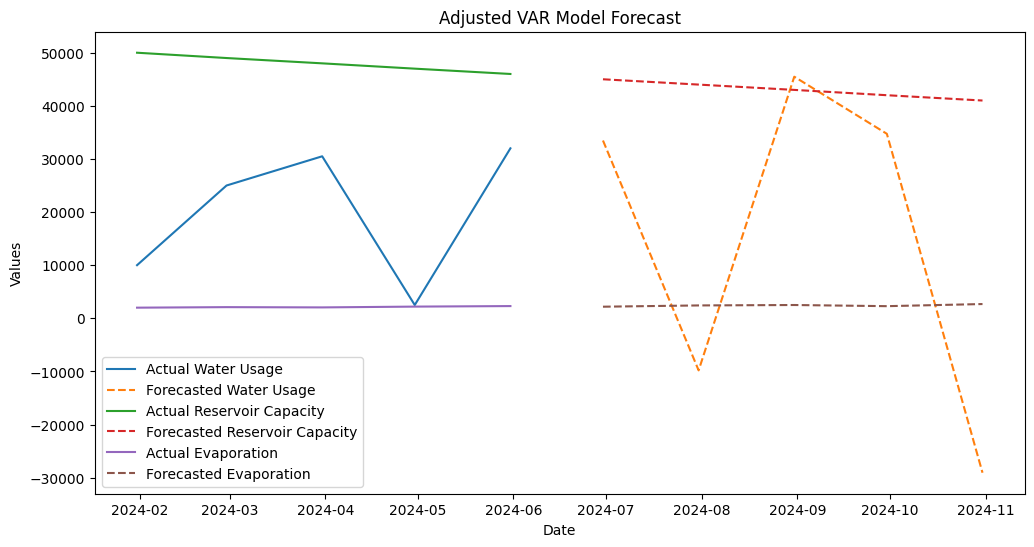

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR

# Sample Data
data = {
    'Date': pd.date_range(start='2024-01-01', periods=5, freq='M'),
    'Water_Usage': [10000, 25000, 30500, 2500, 32000],
    'Reservoir_Capacity': [50000, 49000, 48000, 47000, 46000],
    'Evaporation': [2000, 2100, 2050, 2200, 2300]
}

df = pd.DataFrame(data)
df.set_index('Date', inplace=True)

# Simplified VAR Model
model = VAR(df)
model_fitted = model.fit(maxlags=1)

# Forecasting
forecast_input = df.values[-model_fitted.k_ar:]
forecast = model_fitted.forecast(y=forecast_input, steps=5)
forecast_df = pd.DataFrame(forecast, index=pd.date_range(start='2024-06-01', periods=5, freq='M'), columns=df.columns)

# Plotting the results
plt.figure(figsize=(12, 6))

plt.plot(df.index, df['Water_Usage'], label='Actual Water Usage')
plt.plot(forecast_df.index, forecast_df['Water_Usage'], label='Forecasted Water Usage', linestyle='--')

plt.plot(df.index, df['Reservoir_Capacity'], label='Actual Reservoir Capacity')
plt.plot(forecast_df.index, forecast_df['Reservoir_Capacity'], label='Forecasted Reservoir Capacity', linestyle='--')

plt.plot(df.index, df['Evaporation'], label='Actual Evaporation')
plt.plot(forecast_df.index, forecast_df['Evaporation'], label='Forecasted Evaporation', linestyle='--')
df.head()
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Adjusted VAR Model Forecast')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Load historical data
data = pd.read_excel("/content/water_usage_final_3.xlsx")

# Prepare the dataset for each district
districts = data['district'].unique()
forecast_data = []

# Define the forecast period
forecast_start_date = '2024-01-01'
forecast_end_date = '2026-12-31'
forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='MS')  # Monthly start frequency

for district in districts:
    # Filter historical data for the district
    district_data = data[data['district'] == district]

    # Ensure the district_data is not empty
    if district_data.empty:
        continue

    # Example: Forecasting using ARIMA (you can use any model)
    def forecast_series(series, periods):
        if len(series) > 1:  # Ensure there are enough data points to fit the model
            try:
                model = ARIMA(series, order=(1, 1, 1))  # Example order, adjust as needed
                model_fit = model.fit()
                forecast = model_fit.forecast(steps=periods)  # Forecast for specified periods
                return forecast
            except:
                return np.full(periods, np.nan)  # Return NaN if forecasting fails
        else:
            return np.full(periods, np.nan)  # Return NaN if not enough data

    # Forecasting for 36 months (3 years)
    periods = len(forecast_dates)
    irrigation_forecast = forecast_series(district_data['irrigation'], periods=periods)
    industrial_forecast = forecast_series(district_data['industrial'], periods=periods)
    domestic_forecast = forecast_series(district_data['domestic'], periods=periods)
    irrigation_forecast = irrigation_forecast.tolist()
    industrial_forecast = industrial_forecast.tolist()
    domestic_forecast = domestic_forecast.tolist()
    # Generate the forecast data
    district_data['date'] = pd.to_datetime(district_data['date'])
    gws_fa_df = district_data[district_data['date'].dt.year == 2023][['gws', 'fa']].tail(1)

    # If no data available for 2023, use the most recent available data
    if gws_fa_df.empty:
        gws_fa_df = district_data[['gws', 'fa']].tail(1)

    gws_fa_2023 = gws_fa_df.iloc[0]

    for i in range(periods):
        # No need to adjust index here
        forecast_entry = {
            'district': district,
            'state': district_data['state'].iloc[0],  # Assuming state is the same for the district
            'date': forecast_dates[i],
            'gws': gws_fa_2023['gws'],  # Placeholder, use the last available value
            'irrigation': irrigation_forecast[i],  # Correctly aligned with i
            'industrial': industrial_forecast[i],  # Correctly aligned with i
            'domestic': domestic_forecast[i],  # Correctly aligned with i
            'total': irrigation_forecast[i] + industrial_forecast[i] + domestic_forecast[i],  # Sum of forecasts
            'fa': gws_fa_2023['fa']  # Placeholder, use the last available value
        }
        forecast_data.append(forecast_entry)

# Convert to DataFrame
forecast_df = pd.DataFrame(forecast_data)

# Save the forecasted data to a new Excel file
excel_filename = 'forecasted_water_demand_2024_2026_corrected_1.xlsx'
forecast_df.to_excel(excel_filename, index=False)

print(f"Forecasted data saved to {excel_filename}")

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX


# Load historical data
data = pd.read_excel("/content/water_usage_final_3.xlsx")

# Prepare the dataset for each district
districts = data['district'].unique()
forecast_data = []

# Define the forecast period
forecast_start_date = '2024-01-01'
forecast_end_date = '2026-12-31'
forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='MS')  # Monthly start frequency

for district in districts:
    # Filter historical data for the district
    district_data = data[data['district'] == district]

    # Ensure the district_data is not empty
    if district_data.empty:
        continue

    # Example: Forecasting using ARIMA (you can use any model)
    def forecast_series(series, periods):
        if len(series) > 1:  # Ensure there are enough data points to fit the model
            try:
                model = SARIMAX(series, order=(3, 1, 3), seasonal_order=(1, 1, 1, 12), enforce_stationarity=False, enforce_invertibility=False)
                model_fit = model.fit()
                forecast = model_fit.forecast(steps=periods)  # Forecast for specified periods
                return forecast
            except:
                return np.full(periods, np.nan)  # Return NaN if forecasting fails
        else:
            return np.full(periods, np.nan)  # Return NaN if not enough data

    # Forecasting for 36 months (3 years)
    periods = len(forecast_dates)
    irrigation_forecast = forecast_series(district_data['irrigation'], periods=periods)
    industrial_forecast = forecast_series(district_data['industrial'], periods=periods)
    domestic_forecast = forecast_series(district_data['domestic'], periods=periods)
    irrigation_forecast = irrigation_forecast.tolist()
    industrial_forecast = industrial_forecast.tolist()
    domestic_forecast = domestic_forecast.tolist()
    # Generate the forecast data
    district_data['date'] = pd.to_datetime(district_data['date'])
    gws_fa_df = district_data[district_data['date'].dt.year == 2023][['gws', 'fa']].tail(1)

    # If no data available for 2023, use the most recent available data
    if gws_fa_df.empty:
        gws_fa_df = district_data[['gws', 'fa']].tail(1)

    gws_fa_2023 = gws_fa_df.iloc[0]

    for i in range(periods):
        # No need to adjust index here
        forecast_entry = {
            'district': district,
            'state': district_data['state'].iloc[0],  # Assuming state is the same for the district
            'date': forecast_dates[i],
            'gws': gws_fa_2023['gws'],  # Placeholder, use the last available value
            'irrigation': irrigation_forecast[i],  # Correctly aligned with i
            'industrial': industrial_forecast[i],  # Correctly aligned with i
            'domestic': domestic_forecast[i],  # Correctly aligned with i
            'total': irrigation_forecast[i] + industrial_forecast[i] + domestic_forecast[i],  # Sum of forecasts
            'fa': gws_fa_2023['fa']  # Placeholder, use the last available value
        }
        forecast_data.append(forecast_entry)

# Convert to DataFrame
forecast_df = pd.DataFrame(forecast_data)

# Save the forecasted data to a new Excel file
excel_filename = 'forecasted_water_demand_2024_2026_corrected_1.xlsx'
forecast_df.to_excel(excel_filename, index=False)

print(f"Forecasted data saved to {excel_filename}")
